# Olist subscription strategy review

# Objectives

We will review Olist's current subscription formula for sellers. Then we will try to improve it with a tier based strategy. By exploring the data, We will draw suggestions for a system that would reward sellers that bring the most business. 

# Current formula analysis

The seller pays a subscription of 80RL monthly and 5% on each sell

In [1]:
import pandas as pd

In [2]:
from olist.data import Olist

In [3]:
df_orders = Olist().get_data()['orders']
df_orderpayments = Olist().get_data()['order_payments']

In [4]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
df_orderpayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
df_orders_orderpayments = df_orders.merge(df_orderpayments,on='order_id')


In [7]:
df_orders_orderpayments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [8]:
df_orders_orderpayments.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [75]:
Total_Revenue = df_orders_orderpayments['payment_value'].sum()
Total_Revenue_Millions = round(Total_Revenue/10000000,2)

print('The total generated by Olist is R${}M'.format(Total_Revenue_Millions))

The total generated by Olist is R$1.6M


In [13]:
df_sellers = Olist().get_data()['sellers']

In [14]:
df_orderitems = Olist().get_data()['order_items']

In [15]:
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
df_orderitems.merge(df_orderpayments,on='order_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,boleto,1,343.40
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,boleto,1,386.53
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,credit_card,3,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,credit_card,3,64.71


In [17]:
df_orders_orderpayments_sellers = df_orders_orderpayments.merge(df_orderitems,on='order_id')

In [18]:
df_orders_orderpayments_sellers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


# Analysis

In [19]:
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
df_orderitems.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [22]:
df_orderreviews = Olist().get_data()['order_reviews']

In [23]:
df = df_orderitems[['order_id', 'seller_id', 'price', 'freight_value']].copy().merge(df_orders[['order_id','order_status','order_approved_at','order_delivered_customer_date']],on='order_id')

In [24]:
df = df.merge(df_orderreviews[['order_id','review_score']], on='order_id')
df = df[df['order_status'] == 'delivered']
df.isna().sum()

order_id                          0
seller_id                         0
price                             0
freight_value                     0
order_status                      0
order_approved_at                15
order_delivered_customer_date     8
review_score                      0
dtype: int64

In [25]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df.isna().sum()
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(lambda x : f"{x.month}-{x.year}")
df.head()

,order_id,seller_id,price,freight_value,order_status,order_approved_at,order_delivered_customer_date,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,delivered,2017-09-13 09:45:35,9-2017,5
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,delivered,2017-04-26 11:05:13,5-2017,4
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,delivered,2018-01-14 14:48:30,1-2018,5
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,delivered,2018-08-08 10:10:18,8-2018,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,delivered,2017-02-04 14:10:13,3-2017,5


In [26]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])


In [78]:
def score_cost(score):
    if score == 1 :
        return -100
    if score == 2 :
        return -50
    if score == 3:
        return -40
    return 0

In [79]:
def active_period(max_date, min_date):
    return ((max_date.year - min_date.year) * 12 + max_date.month - min_date.month)* 80


In [81]:
df.columns

Index(['order_id', 'seller_id', 'price', 'freight_value', 'order_status',
       'order_approved_at', 'order_delivered_customer_date', 'review_score'],
      dtype='object')

In [82]:
df_seller_revenue = df[df['order_status'] == 'delivered'].groupby(['seller_id', 'order_delivered_customer_date']).agg(
    total_sells=('price', 'sum'),
    total_freights=('freight_value', 'sum'),
    total_score_cost=('review_score', lambda x: sum(score_cost(score) for score in x)),
    total_subscriptions=('order_approved_at', lambda x: active_period(max(x), min(x)))
).reset_index()

In [83]:
df_seller_revenue

,seller_id,order_delivered_customer_date,total_sells,total_freights,total_score_cost,total_subscriptions
0,0015a82c2db000af6aaaf3ae2ecb0532,10-2017,2685.0,63.06,-100,80.0
1,001cca7ae9ae17fb1caed9dfb1094831,1-2018,894.0,348.39,-80,160.0
2,001cca7ae9ae17fb1caed9dfb1094831,10-2017,2136.0,884.00,-440,80.0
3,001cca7ae9ae17fb1caed9dfb1094831,11-2017,2510.0,790.91,-400,80.0
4,001cca7ae9ae17fb1caed9dfb1094831,12-2017,1451.0,592.18,-80,80.0
...,...,...,...,...,...,...
16015,fffd5413c0700ac820c7069d66d98c89,8-2017,174.2,41.80,-40,80.0
16016,fffd5413c0700ac820c7069d66d98c89,8-2018,580.0,174.94,0,80.0
16017,ffff564a4f9085cd26170f4732393726,1-2017,179.5,51.31,-240,0.0
16018,ffff564a4f9085cd26170f4732393726,10-2016,120.5,26.47,-100,0.0


In [84]:
final_df = df_seller_revenue.drop('order_delivered_customer_date',axis=1).groupby('seller_id').sum()

In [85]:
final_df['total_sells'] = final_df['total_sells'] / 10

In [86]:
final_df['pnl'] = final_df['total_score_cost'] + final_df['total_sells'] + final_df['total_subscriptions']

In [87]:
final_df = final_df.sort_values(by='pnl')

In [88]:
final_df.sort_values(by='pnl',ascending=False)

,total_sells,total_freights,total_score_cost,total_subscriptions,pnl
seller_id,,,,,
53243585a1d6dc2643021fd1853d8905,21590.444,12739.65,-5350,880.0,17120.444
7e93a43ef30c4f03f38b393420bc753a,16575.150,5955.13,-3260,1760.0,15075.150
fa1c13f2614d7b5c4749cbc52fecda94,18964.954,9843.97,-5960,1920.0,14924.954
edb1ef5e36e0c8cd84eb3c9b003e486d,7914.490,3886.24,-1470,1120.0,7564.490
46dc3b2cc0980fb8ec44634e21d2718e,12086.645,11235.64,-6590,1760.0,7256.645
...,...,...,...,...,...
ea8482cd71df3c1969d7b9473ff13abc,3640.884,17193.56,-21260,1520.0,-16099.116
4a3ca9315b744ce9f8e9374361493884,19722.532,34394.67,-42610,2640.0,-20247.468
7c67e1448b00f6e969d365cea6b010ab,18666.401,51216.58,-43800,2960.0,-22173.599


In [89]:
import seaborn as sns

<Axes: xlabel='pnl', ylabel='Count'>

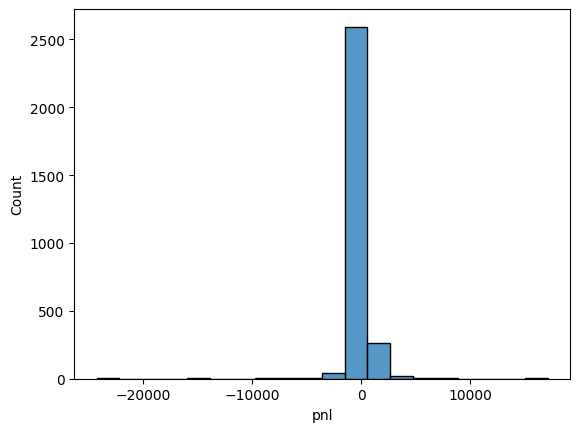

In [90]:
sns.histplot(final_df,x='pnl',bins=20)

In [91]:
Total_Revenue = final_df['pnl'].sum()
Total_Revenue_Millions = round(Total_Revenue/1000000,2)

print('The total generated by Olist is R${}M'.format(Total_Revenue_Millions))

The total generated by Olist is R$0.16M
